# Classify store category based on name
### by Pedro de Bruin

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
min_word_count = 4

# About NLP

In [3]:
import nltk

- **tokenizing** = word tokenizers, sentence tokenizers
- **corpora** = body of text. Examples: medical journals, presidential speeches, English languages
- **lexicon** = basically a dictionary, words and their meanings. Important for domain-specific speech ('bull' = someone who is positive about the market in investor-speak)



In [4]:
datapath = '/Users/pedrosalesdebruin/Downloads/production_retailers_02_06_2019.csv'

In [5]:
df = pd.read_csv('/Users/pedrosalesdebruin/Downloads/bistra_categories.csv')

In [6]:
df_r = pd.read_csv(datapath)

/Users/pedrosalesdebruin/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (12,19,21,26,27,30,38,39,40,43,44,46,47,57,58,61,62,64,65,67,68,71,72,73,74,75) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
cols_to_keep = ['token', 'name']

# Begin with an EDA

In [8]:
df.head()

,retailer_token,category
0,r_4akfeq4w,Beauty
1,r_1uldypnv,Beauty
2,r_55nswjg3,Beauty
3,r_7p9366ct,Beauty
4,r_aiedk15w,Beauty


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174554 entries, 0 to 174553
Data columns (total 2 columns):
retailer_token    174554 non-null object
category          174554 non-null object
dtypes: object(2)
memory usage: 2.7+ MB


In [10]:
df = pd.concat([df, pd.get_dummies(df['category'])], axis=1)

In [11]:
df = df.groupby('retailer_token').max()
df = df.reset_index()

In [12]:
low_pop_classes = df['category'].value_counts()<2
print(low_pop_classes[low_pop_classes].index[0])

Office Supply


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7275 entries, 0 to 7274
Data columns (total 28 columns):
retailer_token              7275 non-null object
category                    7275 non-null object
Beauty                      7275 non-null uint8
Bookstore                   7275 non-null uint8
Coffee Shop                 7275 non-null uint8
Convenience                 7275 non-null uint8
Drug                        7275 non-null uint8
FitnessAndYoga              7275 non-null uint8
Furniture Store             7275 non-null uint8
Gift                        7275 non-null uint8
Grocery                     7275 non-null uint8
Hardware                    7275 non-null uint8
Home Decor                  7275 non-null uint8
Jewelry                     7275 non-null uint8
Kids Clothing Boutique      7275 non-null uint8
LawnAndGarden               7275 non-null uint8
Luggage or Bags             7275 non-null uint8
Mens Clothing Boutique      7275 non-null uint8
MercantileGeneral          

In [14]:
df.head()

,retailer_token,category,Beauty,Bookstore,Coffee Shop,Convenience,Drug,FitnessAndYoga,Furniture Store,Gift,...,MercantileGeneral,Office Supply,Other,Other Foodservice,Pet,SpaAndSalon,SportingGoodsAndOutdoor,Stationery,Toystore,Womens Clothing Boutique
0,r_1016krwx,Home Decor,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,r_103ct3ic,Kids Clothing Boutique,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,r_103rh2t7,SpaAndSalon,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,r_10ffgv3q,Gift,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,r_10jid604,Other,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


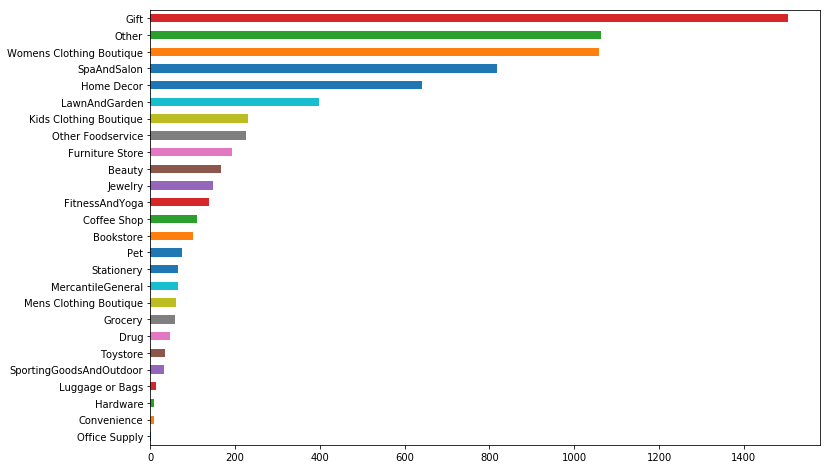

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
df['category'].value_counts().sort_values(ascending=True).plot(kind='barh', ax=ax)

## Merging with retailers df

In [16]:
df_r['store_category'].value_counts()

Gift Store/General Store/Home Decor/Mercantile    1428
Women's Clothing Boutique                          496
Spa/Beauty                                         478
Not Found                                          378
Florist/Garden                                     239
Other                                              147
Kids Store                                         133
Fitness / Yoga                                      70
Bookstore                                           68
Coffee Shop                                         65
Stationery Store                                    37
Men's Clothing Boutique                             28
Name: store_category, dtype: int64

In [17]:
df['category'].value_counts()

Gift                        1504
Other                       1063
Womens Clothing Boutique    1059
SpaAndSalon                  818
Home Decor                   642
LawnAndGarden                397
Kids Clothing Boutique       231
Other Foodservice            227
Furniture Store              192
Beauty                       167
Jewelry                      148
FitnessAndYoga               138
Coffee Shop                  111
Bookstore                    102
Pet                           75
Stationery                    66
MercantileGeneral             65
Mens Clothing Boutique        61
Grocery                       59
Drug                          46
Toystore                      36
SportingGoodsAndOutdoor       33
Luggage or Bags               14
Convenience                   10
Hardware                      10
Office Supply                  1
Name: category, dtype: int64

In [18]:
df_r['category'] = df_r['store_category']

In [19]:
df_r.drop(columns=['store_category'], inplace=True)

In [20]:
cat_to_cat_map = {
    'Gift Store/General Store/Home Decor/Mercantile': 'Gift',
    'Women\'s Clothing Boutique': 'Womens Clothing Boutique',
    'Spa/Beauty': 'SpaAndSalon',
    'Not Found': 'Unknown',
    'Florist/Garden': 'LawnAndGarden',
    'Kids Store': 'Kids Clothing Boutique',
    'Fitness / Yoga': 'FitnessAndYoga',
    'Stationery Store': 'Stationery',
    'Men\'s Clothing Boutique': 'Mens Clothing Boutique'
}
df_r['category'] = df_r['category'].map(cat_to_cat_map)

In [21]:
df_r['category'].value_counts()

Gift                        1428
Womens Clothing Boutique     496
SpaAndSalon                  478
Unknown                      378
LawnAndGarden                239
Kids Clothing Boutique       133
FitnessAndYoga                70
Stationery                    37
Mens Clothing Boutique        28
Name: category, dtype: int64

In [22]:
df = pd.merge(df, df_r[cols_to_keep], left_on='retailer_token', right_on='token')

In [23]:
df.head()

,retailer_token,category,Beauty,Bookstore,Coffee Shop,Convenience,Drug,FitnessAndYoga,Furniture Store,Gift,...,Other,Other Foodservice,Pet,SpaAndSalon,SportingGoodsAndOutdoor,Stationery,Toystore,Womens Clothing Boutique,token,name
0,r_1016krwx,Home Decor,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,r_1016krwx,BLUE DOOR DESIGNS
1,r_103ct3ic,Kids Clothing Boutique,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,r_103ct3ic,Holy Chic Boutique
2,r_103rh2t7,SpaAndSalon,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,r_103rh2t7,Potion Aesthetique
3,r_10ffgv3q,Gift,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,r_10ffgv3q,3 cottage lane
4,r_10jid604,Other,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,r_10jid604,Twincreek Remodeling & Woodworking Co.


## Tokenize names

In [24]:
#Import all the dependencies
import nltk
nltk.download('punkt')
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pedrosalesdebruin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pedrosalesdebruin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [26]:
number_strings = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 
           'ten', 'eleven', 'twelve', 'thirteen', 'fourteen', 'fifteen', 'sixteen', 'seventeen',
           'eighteen', 'nineteen', 'twenty', 'thirty', 'forty', 'fifty' ]
stop_words = stop_words + ['none', 'nan', 'na', 'tbd', 'tba', 'name', 'llc', 'co', 'shop', 'inc', 'ltd', 'yet'
                           'nameyet', 'self', 'test', 'undecided', 'unknown', 'indigo', 
                           'store', 'amazon', 'applicable', 'personal'] + number_strings

In [27]:
def word_counter(in_series):
    counts = {}
    
    for x in in_series.tolist():
        if not isinstance(x, str): continue
        for w in x.split():
            if w not in counts.keys():
                counts[w]=1
            else:
                counts[w]+=1
                
    return counts

### Clean names a bit. Remove punctuation, stopwords...

In [28]:
def clean_name_col(df, col='name'):
    df[col] = df[col].str.lower()
    df["name"] = df['name'].str.replace(r'[^\w\s]+', '')
    # Remove single letters
    df["name"] = df['name'].str.replace(r'\b\w\b','').str.replace(r'\s+', ' ')
    df["name"] = df['name'].str.replace(r'\b\w\b','').str.replace('\d+', '')

    # remove last letter s
    df["name"] = df['name'].str.rstrip('s')
    
    # remove stop words
    df["name"] = df['name'].apply(lambda x: ' '.join([w for w in str(x).split() if w not in stop_words]) )
    
    return df

In [29]:
df = clean_name_col(df)

## What is the min word count?

In [30]:
word_count = dict(sorted(word_counter(df['name']).items(), key=lambda kv: kv[1], reverse=True));

In [31]:
frequent_words = dict((k, v) for k, v in word_count.items() if v >= min_word_count)

In [32]:
#frequent_words.keys()

In [33]:
df['name'] = df['name'].apply(
    lambda x: ' '.join([w for w in str(x).split() if w in frequent_words.keys()]) )

### Now let's plot most common words:

(5, 3000)

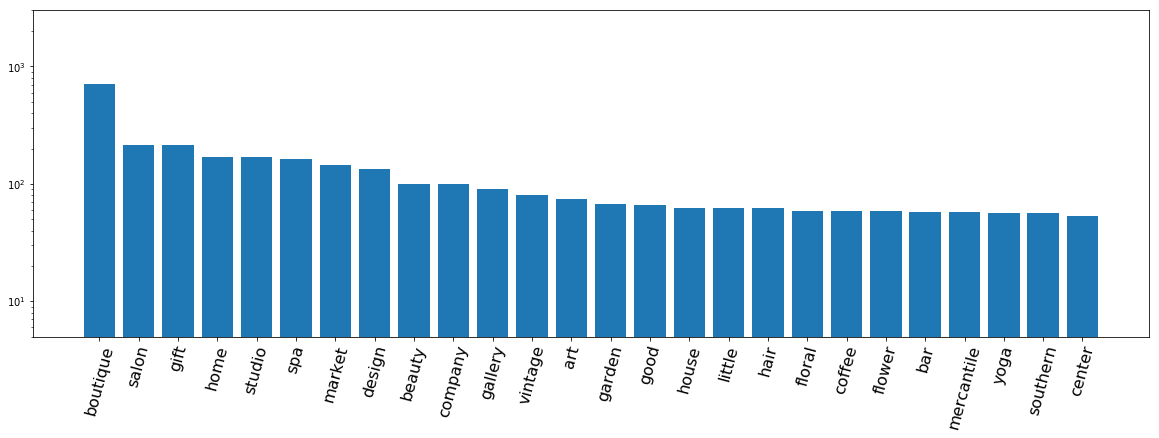

In [34]:
words_to_plot = {k:v for (k,v) in frequent_words.items() if v > 50}

fig, ax = plt.subplots(figsize=(20,6))

plot = plt.bar(x=words_to_plot.keys(), height=words_to_plot.values())

plt.xticks(fontsize=16, rotation=75);
plt.yscale('log')
plt.ylim(5, 3000)

### Word2Vec classification

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit

In [36]:
df['name'].head()

0    blue door design
1       chic boutique
2                    
3        cottage lane
4                    
Name: name, dtype: object

In [37]:
# split the data, leave 1/4 out for testing
df['joined_name'] = df['name'].apply(lambda x: ' '.join([w for w in x.split()]))

In [38]:
df['joined_name'].head()

0    blue door design
1       chic boutique
2                    
3        cottage lane
4                    
Name: joined_name, dtype: object

In [39]:
df['category'].value_counts()

Gift                        1504
Other                       1063
Womens Clothing Boutique    1059
SpaAndSalon                  818
Home Decor                   642
LawnAndGarden                397
Kids Clothing Boutique       231
Other Foodservice            227
Furniture Store              192
Beauty                       167
Jewelry                      148
FitnessAndYoga               138
Coffee Shop                  111
Bookstore                    102
Pet                           75
Stationery                    66
MercantileGeneral             65
Mens Clothing Boutique        61
Grocery                       59
Drug                          46
Toystore                      36
SportingGoodsAndOutdoor       33
Luggage or Bags               14
Convenience                   10
Hardware                      10
Office Supply                  1
Name: category, dtype: int64

In [40]:
df = df.loc[df['category']!='Office Supply', :]

In [41]:
data_x = df[['joined_name']].as_matrix()
data_y = df[['category']].as_matrix()

stratified_split = StratifiedShuffleSplit(n_splits=2, test_size=0.15)
for train_index, test_index in stratified_split.split(data_x, data_y):
    x_train, x_test = data_x[train_index], data_x[test_index]
    y_train, y_test = data_y[train_index], data_y[test_index]

/Users/pedrosalesdebruin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Users/pedrosalesdebruin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [42]:
# transform matrix of name into lists to pass to a TfidfVectorizer
train_x = [x[0] for x in x_train.tolist()]
test_x = [x[0] for x in x_test.tolist()]

In [43]:
train_y = [y[0] for y in y_train.tolist()]
test_y = [y[0] for y in y_test.tolist()]

In [44]:
train_x[:3]

['childrens boutique', '', 'reserve']

In [45]:
train_y[:3]

['Kids Clothing Boutique', 'Coffee Shop', 'Other Foodservice']

## Training the classifier

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

## Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'))),
#     ('clf', OneVsOneClassifier(LogisticRegression(solver='sag'))),
])
parameters = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    "clf__estimator__C": [0.01, 0.1, 1],
    "clf__estimator__class_weight": ['balanced', None],

}

### Tune hyperparameters

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=2, verbose=3)
grid_search_tune.fit(train_x, train_y)

Fitting 2 folds for each of 54 candidates, totalling 108 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    6.6s
[Parallel(n_jobs=2)]: Done 108 out of 108 | elapsed:   29.7s finished
/Users/pedrosalesdebruin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ate=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None))]),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'tfidf__max_df': (0.25, 0.5, 0.75), 'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)], 'clf__estimator__C': [0.01, 0.1, 1], 'clf__estimator__class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [51]:
print("\nBest parameters set:")
print(grid_search_tune.best_estimator_.steps)
print()


Best parameters set:
[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.25, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)), ('clf', OneVsRestClassifier(estimator=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None))]



In [52]:
# measuring performance on test set
print("Applying best classifier on test data:")
best_clf = grid_search_tune.best_estimator_
predictions = best_clf.predict(test_x)
print(best_clf)

Applying best classifier on test data:
Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.25, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True...ate=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None))])


In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(test_y, predictions))

                          precision    recall  f1-score   support

                  Beauty       0.75      0.12      0.21        25
               Bookstore       0.82      0.60      0.69        15
             Coffee Shop       0.64      0.53      0.58        17
             Convenience       0.00      0.00      0.00         1
                    Drug       1.00      1.00      1.00         7
          FitnessAndYoga       1.00      0.67      0.80        21
         Furniture Store       0.33      0.03      0.06        29
                    Gift       0.27      0.70      0.39       226
                 Grocery       1.00      0.11      0.20         9
                Hardware       0.00      0.00      0.00         1
              Home Decor       0.33      0.18      0.23        96
                 Jewelry       0.60      0.14      0.22        22
  Kids Clothing Boutique       1.00      0.20      0.33        35
           LawnAndGarden       0.89      0.57      0.69        60
         

/Users/pedrosalesdebruin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Naive Bayes

In [55]:
from sklearn.naive_bayes import MultinomialNB

In [56]:
pipelineNB = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', OneVsRestClassifier(MultinomialNB(
#     ('clf', OneVsOneClassifier(MultinomialNB(
        fit_prior=True, class_prior=None))),
])
parametersNB = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__estimator__alpha': (1e-2, 1e-3)
}

In [57]:
grid_search_tune = GridSearchCV(pipelineNB, parametersNB, cv=2, n_jobs=2, verbose=3)
grid_search_tune.fit(train_x, train_y)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  36 out of  36 | elapsed:    1.9s finished


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ifier(estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
          n_jobs=None))]),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'tfidf__max_df': (0.25, 0.5, 0.75), 'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)], 'clf__estimator__alpha': (0.01, 0.001)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [58]:
print("\nBest parameters set:")
print(grid_search_tune.best_estimator_.steps)
print()


Best parameters set:
[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.25, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)), ('clf', OneVsRestClassifier(estimator=MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True),
          n_jobs=None))]



In [59]:
# measuring performance on test set
print("Applying best classifier on test data:")
best_clf = grid_search_tune.best_estimator_
predictions = best_clf.predict(test_x)
print(best_clf)

Applying best classifier on test data:
Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.25, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True...fier(estimator=MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True),
          n_jobs=None))])


In [60]:
print(classification_report(test_y, predictions))

                          precision    recall  f1-score   support

                  Beauty       0.50      0.20      0.29        25
               Bookstore       0.67      0.67      0.67        15
             Coffee Shop       0.55      0.35      0.43        17
             Convenience       0.00      0.00      0.00         1
                    Drug       1.00      1.00      1.00         7
          FitnessAndYoga       0.82      0.67      0.74        21
         Furniture Store       0.10      0.03      0.05        29
                    Gift       0.29      0.62      0.39       226
                 Grocery       0.33      0.11      0.17         9
                Hardware       0.00      0.00      0.00         1
              Home Decor       0.32      0.22      0.26        96
                 Jewelry       0.30      0.14      0.19        22
  Kids Clothing Boutique       0.71      0.29      0.41        35
           LawnAndGarden       0.80      0.58      0.67        60
         

/Users/pedrosalesdebruin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
cm = confusion_matrix(test_y, predictions)

## SVM Linear

In [63]:
from sklearn.svm import LinearSVC

In [64]:
pipelineSVM = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                     ('clf', OneVsRestClassifier(LinearSVC())),])
#                     ('clf', OneVsOneClassifier(LinearSVC())),])
parametersSVM = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    "clf__estimator__C": [0.01, 0.1, 1],
    "clf__estimator__class_weight": ['balanced', None],
}

In [65]:
grid_search_tune = GridSearchCV(pipelineNB, parametersNB, cv=2, n_jobs=2, verbose=3)
grid_search_tune.fit(train_x, train_y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=2)]: Done  36 out of  36 | elapsed:    1.8s finished


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ifier(estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
          n_jobs=None))]),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'tfidf__max_df': (0.25, 0.5, 0.75), 'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)], 'clf__estimator__alpha': (0.01, 0.001)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [66]:
print("\nBest parameters set:")
print(grid_search_tune.best_estimator_.steps)
print()


Best parameters set:
[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.25, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)), ('clf', OneVsRestClassifier(estimator=MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True),
          n_jobs=None))]



In [67]:
# measuring performance on test set
print("Applying best classifier on test data:")
best_clf = grid_search_tune.best_estimator_
predictions = best_clf.predict(test_x)
print(best_clf)

Applying best classifier on test data:
Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.25, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True...fier(estimator=MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True),
          n_jobs=None))])


In [68]:
print(classification_report(test_y, predictions))

                          precision    recall  f1-score   support

                  Beauty       0.50      0.20      0.29        25
               Bookstore       0.67      0.67      0.67        15
             Coffee Shop       0.55      0.35      0.43        17
             Convenience       0.00      0.00      0.00         1
                    Drug       1.00      1.00      1.00         7
          FitnessAndYoga       0.82      0.67      0.74        21
         Furniture Store       0.10      0.03      0.05        29
                    Gift       0.29      0.62      0.39       226
                 Grocery       0.33      0.11      0.17         9
                Hardware       0.00      0.00      0.00         1
              Home Decor       0.32      0.22      0.26        96
                 Jewelry       0.30      0.14      0.19        22
  Kids Clothing Boutique       0.71      0.29      0.41        35
           LawnAndGarden       0.80      0.58      0.67        60
         

/Users/pedrosalesdebruin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Use best model on new stores:

In [69]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'))),
#     ('clf', OneVsOneClassifier(LogisticRegression(solver='sag'))),
])
parameters = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    "clf__estimator__C": [0.01, 0.1, 1],
    "clf__estimator__class_weight": ['balanced', None],

}

In [70]:
grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=2, verbose=3)
grid_search_tune.fit(train_x, train_y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 54 candidates, totalling 108 fits


[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    6.2s
[Parallel(n_jobs=2)]: Done 108 out of 108 | elapsed:   30.5s finished
/Users/pedrosalesdebruin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ate=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None))]),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'tfidf__max_df': (0.25, 0.5, 0.75), 'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)], 'clf__estimator__C': [0.01, 0.1, 1], 'clf__estimator__class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [71]:
print("\nBest parameters set:")
print(grid_search_tune.best_estimator_.steps)
print()


Best parameters set:
[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.25, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)), ('clf', OneVsRestClassifier(estimator=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None))]



In [72]:
# measuring performance on test set
print("Applying best classifier on test data:")
best_clf = grid_search_tune.best_estimator_
predictions = best_clf.predict(test_x)
print(best_clf)

Applying best classifier on test data:
Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.25, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True...ate=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None))])


In [73]:
print(classification_report(test_y, predictions))

                          precision    recall  f1-score   support

                  Beauty       0.75      0.12      0.21        25
               Bookstore       0.82      0.60      0.69        15
             Coffee Shop       0.64      0.53      0.58        17
             Convenience       0.00      0.00      0.00         1
                    Drug       1.00      1.00      1.00         7
          FitnessAndYoga       1.00      0.67      0.80        21
         Furniture Store       0.33      0.03      0.06        29
                    Gift       0.27      0.70      0.39       226
                 Grocery       1.00      0.11      0.20         9
                Hardware       0.00      0.00      0.00         1
              Home Decor       0.33      0.18      0.23        96
                 Jewelry       0.60      0.14      0.22        22
  Kids Clothing Boutique       1.00      0.20      0.33        35
           LawnAndGarden       0.89      0.57      0.69        60
         

/Users/pedrosalesdebruin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [74]:
best_clf.classes_

array(['Beauty', 'Bookstore', 'Coffee Shop', 'Convenience', 'Drug',
       'FitnessAndYoga', 'Furniture Store', 'Gift', 'Grocery', 'Hardware',
       'Home Decor', 'Jewelry', 'Kids Clothing Boutique', 'LawnAndGarden',
       'Luggage or Bags', 'Mens Clothing Boutique', 'MercantileGeneral',
       'Other', 'Other Foodservice', 'Pet', 'SpaAndSalon',
       'SportingGoodsAndOutdoor', 'Stationery', 'Toystore',
       'Womens Clothing Boutique'], dtype='<U24')

In [75]:
proba_predictions = best_clf.predict_proba(test_x)

## Clean new dataset the same way

In [76]:
df_r = clean_name_col(df_r)

In [77]:
df_r['name'] = df_r['name'].apply(
    lambda x: ' '.join([w for w in str(x).split() if w in frequent_words.keys()]) )

In [78]:
# split the data, leave 1/4 out for testing
df_r['joined_name'] = df_r['name'].apply(lambda x: ", ".join([w for w in x.split()]))

In [79]:
data_x = df_r[['joined_name']].as_matrix()
data_y = df_r[['category']].as_matrix()

/Users/pedrosalesdebruin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Users/pedrosalesdebruin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [80]:
# transform matrix of name into lists to pass to a TfidfVectorizer
x_data = [x[0] for x in data_x.tolist()]

In [81]:
y_data = [y[0] for y in data_y.tolist()]

In [82]:
predictions = best_clf.predict(x_data)
proba_predictions = best_clf.predict_proba(x_data)

In [83]:
proba_predictions.shape

(102866, 25)

In [84]:
df_r.shape

(102866, 78)

In [85]:
df_r['category_prediction_tfidf'] = predictions

In [86]:
df_r.loc[df_r['joined_name']=='', 'category_prediction_tfidf'] = 'Name too unique to guess'

# Spot check time

In [87]:
df_r.loc[df_r['category_prediction_tfidf']=='Stationery', 'name']

47                        stationery
132                            paper
164                            paper
323                            paper
381                            paper
1658                           paper
1746                           paper
1831                           paper
1834                           paper
2023                      paper rock
2044                           paper
2050                      stationery
2359                           paper
2401                           paper
2403                      stationery
2416                           paper
2500                      rock paper
2594                      stationery
2609                           paper
2796                           paper
2808                           paper
2956                      stationery
2970                           paper
3001                           paper
3233                           paper
3279                           paper
3319                           paper
3

In [88]:
df_r.loc[df_r['category_prediction_tfidf']=='Womens Clothing Boutique', 'name']

25                    boutique
46                          st
65               city clothing
92                        best
108                   beach st
113                       pink
116                       wear
123                 love child
136         consignment shoppe
143                         st
181                      urban
193                        mad
196                    couture
231                      queen
237                      urban
244                       lane
264                   boutique
267                      dream
295                      dream
311             bella boutique
350        urban chic boutique
364                         st
365            golden boutique
386            sweet lady jane
389       city market boutique
399                      gypsy
428                    apparel
457                      shine
517             bloom boutique
580                      black
                  ...         
102584                boutique
102603  

In [89]:
df_r.loc[df_r['category_prediction_tfidf']=='Pet', 'name'].sample(30)

64956            pet boutique
101436              happy pet
97634             pet spa pet
59989                dog side
101967                    pet
50699      natural pet center
68631                     dog
75516                love pet
92077                     paw
7058                      pet
86873             pet product
20579                     dog
66346               pet wants
20677             pet element
12129               pet wants
82092                     paw
94889              pet resort
93907                pure pet
77163      creek pet boutique
66700        pet boutique bar
80856                     dog
69253               pet wants
23604             pet product
13788     dream dba pet wants
38371                     dog
83062           pet wants san
14365                     paw
77410                     pet
14429                     pet
83249                     dog
Name: name, dtype: object

In [90]:
df_r.loc[df_r['category_prediction_tfidf']=='FitnessAndYoga', 'name'].sample(30)

92155                    hot yoga place
101268                      yoga center
31760                              yoga
57877                          bay yoga
101273                        nest yoga
101133                      yoga center
74738                         yoga cape
50440                   yoga collective
44631             nature yoga sanctuary
88158     north yoga wellness sanctuary
97448                              yoga
78968                            wellne
66292                              yoga
7439                 yoga garage rabbit
48856                            wellne
27970                              yoga
13790                        body barre
100113                   fitness studio
65778               south mountain yoga
92398                       yoga wellne
66208                            wellne
59901                              yoga
54938                              yoga
99637                              yoga
20531                              yoga


In [91]:
df_r.loc[df_r['category_prediction_tfidf']=='Pet', 'name'].sample(30)

76775                                 paw
10000                        discount pet
102181                       pet boutique
42009                     pet wants north
16685                           south paw
2166                              dog toy
67964                                 pet
67207                                 pet
66447                            pet food
93552                                 paw
65543                        red pet food
9800                        pet wants san
26863                                 pet
41943                           pet wants
94647                                 dog
13982                                 dog
77313                             joy pet
102707                         pet design
36198                        pet emporium
20640                          pet resort
92027     lucky dog outfitters pet supply
97754                        pet emporium
42080                           pet wants
84408                      pet pet

In [92]:
df_r.loc[df_r['category_prediction_tfidf']=='Gift', 'name'].sample(30)

23796     white river mercantile
62624           white owl market
88822                lilac honey
62792              north gallery
60778                       lady
22793                      creek
69111             desert cottage
10819                      honey
36090                     simple
97363             copper company
97869         barn door boutique
57340                       blue
75928                        bee
19235                       lady
97056                      place
48655                       twig
35523                        ann
27502                      flora
57541                 collection
85878                   treasure
763                         city
100616                    street
1036                        wood
66303                    panache
18525              hospital gift
6021                      silver
60939                hello sweet
68642                   paradise
86328               town country
77783                   bath bee
Name: name

In [93]:
for i, p in enumerate(best_clf.classes_):
    df_r['proba_'+p] = proba_predictions[:, i]
    df_r.loc[df_r['name']=='', 'proba_'+p]=0

## Write probabilities to file

In [94]:
df_r.to_csv('/Users/pedrosalesdebruin/Development/datascience/data/tfidf_categories.csv', index=False)

# Value counts new vs old

In [95]:
df_r['category_prediction_tfidf'].value_counts()

Name too unique to guess    36667
Gift                        24644
Womens Clothing Boutique    11724
Other                        9759
SpaAndSalon                  6980
Home Decor                   5678
LawnAndGarden                2187
Kids Clothing Boutique        654
Coffee Shop                   613
Bookstore                     550
MercantileGeneral             507
FitnessAndYoga                479
Other Foodservice             445
Jewelry                       442
Beauty                        334
Drug                          317
Furniture Store               282
Pet                           270
Stationery                    150
Hardware                       72
Toystore                       59
Grocery                        53
Name: category_prediction_tfidf, dtype: int64

In [96]:
df['category'].value_counts()

Gift                        1504
Other                       1063
Womens Clothing Boutique    1059
SpaAndSalon                  818
Home Decor                   642
LawnAndGarden                397
Kids Clothing Boutique       231
Other Foodservice            227
Furniture Store              192
Beauty                       167
Jewelry                      148
FitnessAndYoga               138
Coffee Shop                  111
Bookstore                    102
Pet                           75
Stationery                    66
MercantileGeneral             65
Mens Clothing Boutique        61
Grocery                       59
Drug                          46
Toystore                      36
SportingGoodsAndOutdoor       33
Luggage or Bags               14
Convenience                   10
Hardware                      10
Name: category, dtype: int64

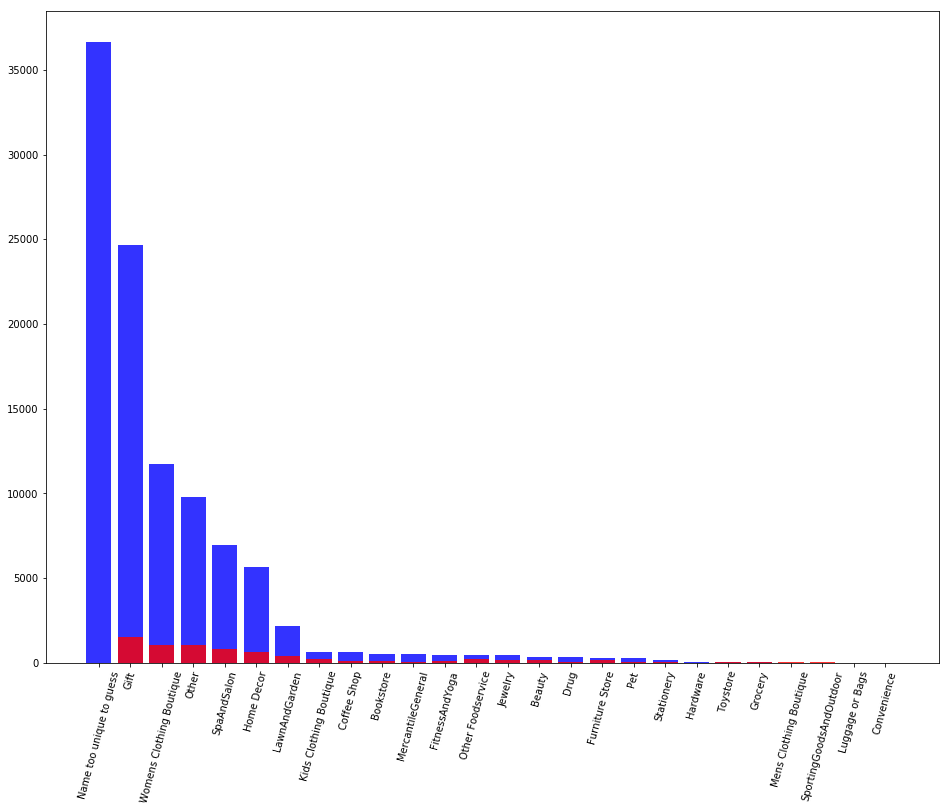

In [97]:
new_cat_counts = df_r['category_prediction_tfidf'].value_counts()
old_cat_counts = df['category'].value_counts()

fig, ax = plt.subplots(figsize=(16, 12))

ax.bar(new_cat_counts.index, new_cat_counts.values, color='b', align='center', alpha=0.8)
ax.bar(old_cat_counts.index, old_cat_counts.values, color='r', align='center', alpha=0.8)

plt.xticks(rotation=75);
# plt.yscale('log')

In [98]:
old_cat_counts.index.shape

(25,)

In [99]:
for missing_idx in [x for x in old_cat_counts.index.tolist() if x not in new_cat_counts.index.tolist()]:
    new_cat_counts[missing_idx] = 0

for missing_idx in [x for x in new_cat_counts.index.tolist() if x not in old_cat_counts.index.tolist()]:
    old_cat_counts[missing_idx] = 0

In [100]:
new_cat_counts.index.shape

(26,)

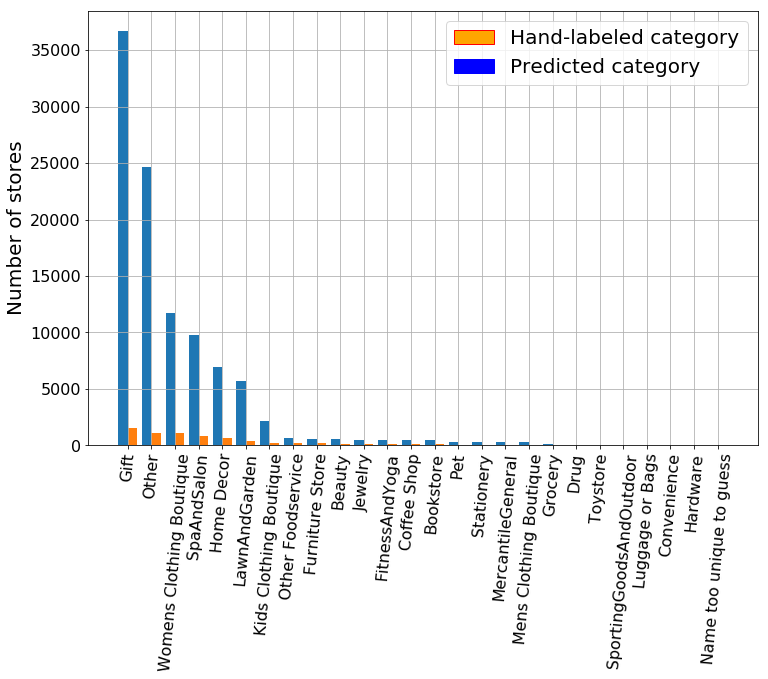

In [101]:
from matplotlib.patches import Patch

def subcategorybar(X, vals, width=0.8):
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge")   
    plt.xticks(_X, X)


fig, ax = plt.subplots(figsize=(12, 8))
# plt.figure(figsize=(20, 16))
subcategorybar(old_cat_counts.index, [new_cat_counts.values, old_cat_counts.values])

plt.xticks(fontsize=16, rotation=85)
plt.yticks(fontsize=16)
# plt.yscale('log')
plt.ylabel('Number of stores', fontsize=20)

legend_elements = [Patch(facecolor='orange', edgecolor='r', label='Hand-labeled category'), 
                   Patch(facecolor='blue', edgecolor='b', label='Predicted category'), ]

# Create the figure
ax.legend(handles=legend_elements, loc='best', prop={'size':20})

plt.grid()
plt.show()

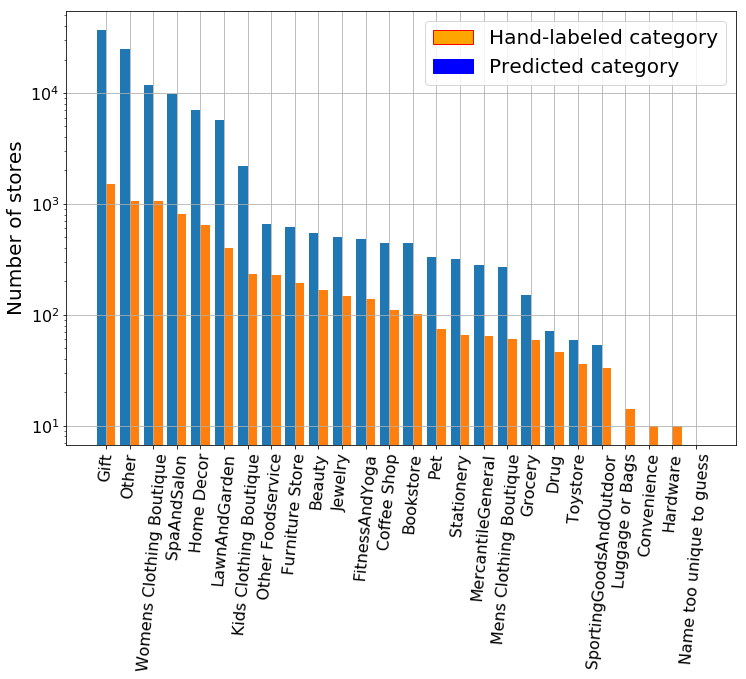

In [102]:
fig, ax = plt.subplots(figsize=(12, 8))
# plt.figure(figsize=(20, 16))
subcategorybar(old_cat_counts.index, [new_cat_counts.values, old_cat_counts.values])

plt.xticks(fontsize=16, rotation=85)
plt.yticks(fontsize=16)
plt.yscale('log')
plt.ylabel('Number of stores', fontsize=20)

legend_elements = [Patch(facecolor='orange', edgecolor='r', label='Hand-labeled category'), 
                   Patch(facecolor='blue', edgecolor='b', label='Predicted category'), ]

# Create the figure
ax.legend(handles=legend_elements, loc='best', prop={'size':20})

plt.grid()
plt.show()

In [103]:
proba_cols = [x for x in df_r.columns.tolist() if 'proba_' in x]

In [104]:
sum('food' in x or 'market' in x or 'grocer' in x for x in df_r.loc[df_r['proba_Grocery']>0.1, 'name'].tolist())

575

In [105]:
df_r.loc[df_r['category_prediction_tfidf']=='Womens Clothing Boutique', 'name']

25                    boutique
46                          st
65               city clothing
92                        best
108                   beach st
113                       pink
116                       wear
123                 love child
136         consignment shoppe
143                         st
181                      urban
193                        mad
196                    couture
231                      queen
237                      urban
244                       lane
264                   boutique
267                      dream
295                      dream
311             bella boutique
350        urban chic boutique
364                         st
365            golden boutique
386            sweet lady jane
389       city market boutique
399                      gypsy
428                    apparel
457                      shine
517             bloom boutique
580                      black
                  ...         
102584                boutique
102603  

In [106]:
df_r.loc[df_r['proba_Beauty']>0.1, 'name']

78                         beauty shoppe
183                               beauty
283                               beauty
284                               beauty
502                           apothecary
585                        beauty supply
644                               beauty
1024                       beauty supply
1276                        bath organic
1278                                bath
1328                              norman
1818                         bath beyond
2098                         soap studio
2286                           jane soap
2405                           bath body
2548                              beauty
2583                                soap
2794                         beauty care
3266                          apothecary
3325                 luxury bath product
3330                     bloom bath body
3350                          apothecary
3385                         back beauty
3584                              beauty
3967            

In [107]:
sum(['beauty' in x for x in df_r.loc[df_r['proba_Beauty']>0.1, 'name'].tolist()])

730

In [108]:
sum(['book' in x for x in df_r.loc[df_r['proba_Bookstore']>0.1, 'name'].tolist()])

638

In [109]:
sum(['drug' in x for x in df_r.loc[df_r['proba_Drug']>0.1, 'name'].tolist()])

94

In [110]:
sum(['gift' in x for x in df_r.loc[df_r['proba_Gift']>0.1, 'name'].tolist()])

2581

In [111]:
sum(['garden' in x for x in df_r.loc[df_r['proba_LawnAndGarden']>0.1, 'name'].tolist()])

546

In [112]:
sum(['yoga' in x for x in df_r.loc[df_r['proba_FitnessAndYoga']>0.1, 'name'].tolist()])

371

In [113]:
#df_r['best_guess'] = 